In [1]:
import pandas as pd
import numpy as np

In [2]:
apps_df = pd.read_csv("apps_saved.csv")

reviews_df = pd.read_csv("user_reviews_saved.csv")

In [3]:
apps_df.head(5)


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
reviews_df.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [9]:
apps_df.describe()

,Unnamed: 0,Rating,Reviews,Size
count,9659.000000,8196.000000,9.659000e+03,8432.000000
mean,5666.172896,4.173243,2.165926e+05,20.395327
std,3102.362863,0.536625,1.831320e+06,21.827509
min,0.000000,1.000000,0.000000e+00,0.000000
25%,3111.500000,4.000000,2.500000e+01,4.600000
50%,5814.000000,4.300000,9.670000e+02,12.000000
75%,8327.500000,4.500000,2.940100e+04,28.000000
max,10840.000000,5.000000,7.815831e+07,100.000000


In [11]:
reviews_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [13]:
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [15]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [17]:
apps_df.isnull().sum()

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [19]:
reviews_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [21]:
# 1. Drop 'Unnamed: 0' column
apps_df.drop('Unnamed: 0', axis=1, inplace=True)

In [23]:
# 2. Clean and convert 'Installs' column
# Remove '+' and ',' and convert to numeric
apps_df['Installs'] = apps_df['Installs'].str.replace('+', '', regex=False).str.replace(',', '', regex=False)
# Handle potential 'Free' values that might appear if not cleaned properly elsewhere (though unlikely given the context)
# If 'Installs' has non-numeric values after stripping, pd.to_numeric will coerce them to NaN
apps_df['Installs'] = pd.to_numeric(apps_df['Installs'], errors='coerce')
# For simplicity, if there are any NaNs introduced by 'coerce', fill them with 0 or a reasonable value
apps_df['Installs'].fillna(0, inplace=True) # Assuming 0 installs for unparseable entries
apps_df['Installs'] = apps_df['Installs'].astype(int)
print("Cleaned and converted 'Installs' to integer.")

Cleaned and converted 'Installs' to integer.


C:\Users\User\AppData\Local\Temp\ipykernel_10188\3907174160.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  apps_df['Installs'].fillna(0, inplace=True) # Assuming 0 installs for unparseable entries


In [25]:
# 3. Clean and convert 'Price' column
# Remove '$' and convert to float
apps_df['Price'] = apps_df['Price'].str.replace('$', '', regex=False)
apps_df['Price'] = pd.to_numeric(apps_df['Price'], errors='coerce')
apps_df['Price'].fillna(0.0, inplace=True) # Fill potential NaNs from 'coerce' with 0.0
print("Cleaned and converted 'Price' to float.")


Cleaned and converted 'Price' to float.


C:\Users\User\AppData\Local\Temp\ipykernel_10188\2842586708.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  apps_df['Price'].fillna(0.0, inplace=True) # Fill potential NaNs from 'coerce' with 0.0


In [27]:
median_rating = apps_df['Rating'].median()
apps_df['Rating'].fillna(median_rating, inplace=True)
print(f"Filled missing 'Rating' values with median: {median_rating:.2f}")

Filled missing 'Rating' values with median: 4.30


C:\Users\User\AppData\Local\Temp\ipykernel_10188\3939764151.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  apps_df['Rating'].fillna(median_rating, inplace=True)


In [29]:
median_size = apps_df['Size'].median()
apps_df['Size'].fillna(median_size, inplace=True)
print(f"Filled missing 'Size' values with median: {median_size:.2f}")

Filled missing 'Size' values with median: 12.00


C:\Users\User\AppData\Local\Temp\ipykernel_10188\1727768564.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  apps_df['Size'].fillna(median_size, inplace=True)


In [31]:
mode_current_ver = apps_df['Current Ver'].mode()[0] # .mode() returns a Series, so take the first element
apps_df['Current Ver'].fillna(mode_current_ver, inplace=True)
print(f"Filled missing 'Current Ver' values with mode: {mode_current_ver}")

Filled missing 'Current Ver' values with mode: Varies with device


C:\Users\User\AppData\Local\Temp\ipykernel_10188\2494178124.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  apps_df['Current Ver'].fillna(mode_current_ver, inplace=True)


In [33]:
mode_android_ver = apps_df['Android Ver'].mode()[0]
apps_df['Android Ver'].fillna(mode_android_ver, inplace=True)
print(f"Filled missing 'Android Ver' values with mode: {mode_android_ver}")

Filled missing 'Android Ver' values with mode: 4.1 and up


C:\Users\User\AppData\Local\Temp\ipykernel_10188\1988526918.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  apps_df['Android Ver'].fillna(mode_android_ver, inplace=True)


In [35]:
# 1. Drop rows with missing sentiment information
# These columns seem to have missing values together, so checking one is sufficient.
initial_reviews_rows = reviews_df.shape[0]
reviews_df.dropna(subset=['Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity'], inplace=True)
rows_dropped = initial_reviews_rows - reviews_df.shape[0]
print(f"Dropped {rows_dropped} rows from reviews_df due to missing sentiment information.")


Dropped 26863 rows from reviews_df due to missing sentiment information.


In [37]:
# --- Final Check After Cleaning ---
print("\n--- apps_df after cleaning (info & nulls) ---")
apps_df.info()
print("\nMissing values per column in apps_df:")
print(apps_df.isnull().sum())

print("\n--- reviews_df after cleaning (info & nulls) ---")
reviews_df.info()
print("\nMissing values per column in reviews_df:")
print(reviews_df.isnull().sum())

print("\nCleaning complete! DataFrames are now ready for further analysis.")


--- apps_df after cleaning (info & nulls) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            9659 non-null   float64
 5   Installs        9659 non-null   int32  
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9659 non-null   object 
 12  Android Ver     9659 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 943.4+ KB

Missing values per column in apps_df:
App               0
Category          0
Rating            

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count apps per category
category_counts = apps_df['Category'].value_counts()

# Identify the number of unique categories
num_unique_categories = len(category_counts)
print(f"\nThere are {num_unique_categories} unique app categories.")

# Print the top 15 most popular categories
print("\n-Top 15 Most Popular App Categories ")
print(category_counts.head(15))



There are 33 unique app categories.

-Top 15 Most Popular App Categories 
Category
FAMILY                1832
GAME                   959
TOOLS                  827
BUSINESS               420
MEDICAL                395
PERSONALIZATION        376
PRODUCTIVITY           374
LIFESTYLE              369
FINANCE                345
SPORTS                 325
COMMUNICATION          315
HEALTH_AND_FITNESS     288
PHOTOGRAPHY            281
NEWS_AND_MAGAZINES     254
SOCIAL                 239
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_10188\2068172474.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Apps', y='Category', data=plot_data, palette='viridis')


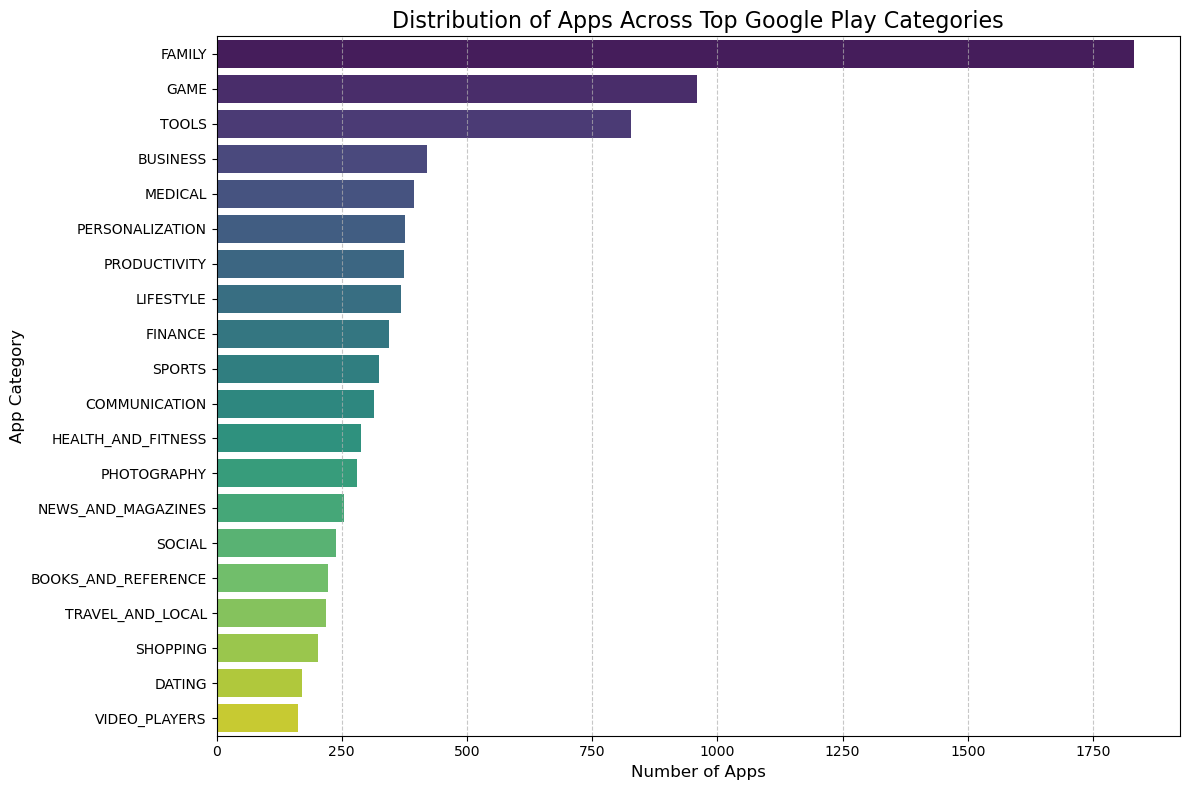

In [40]:
# Calculate the count of apps per category
category_counts = apps_df['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Number of Apps']

# Sort for consistent plotting (already sorted by value_counts by default)
category_counts_sorted = category_counts.sort_values(by='Number of Apps', ascending=False)

# Select top N categories for clarity, or all if less than N
num_categories_to_plot = min(20, len(category_counts_sorted))
plot_data = category_counts_sorted.head(num_categories_to_plot)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Apps', y='Category', data=plot_data, palette='viridis')
plt.title('Distribution of Apps Across Top Google Play Categories', fontsize=16)
plt.xlabel('Number of Apps', fontsize=12)
plt.ylabel('App Category', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()





--- Metrics Analysis: App Ratings ---

Descriptive Statistics for App Ratings:
count    9659.000000
mean        4.192442
std         0.496397
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64


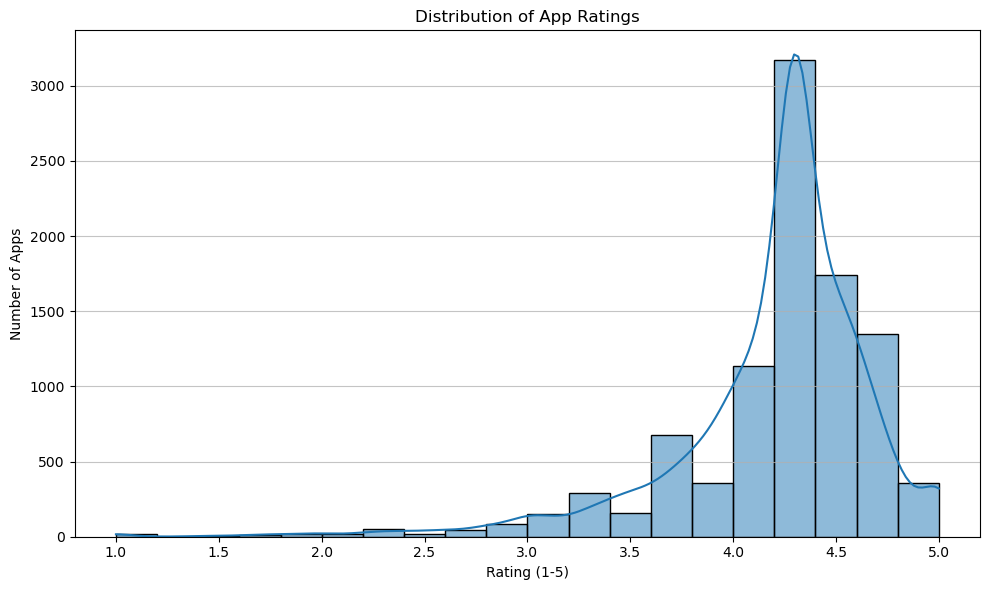

In [41]:
# --- Metrics Analysis: App Ratings ---
print("\n--- Metrics Analysis: App Ratings ---")

# Get descriptive statistics for the 'Rating' column
print("\nDescriptive Statistics for App Ratings:")
print(apps_df['Rating'].describe())

# Plot a histogram of app ratings using matplotlib
plt.figure(figsize=(10, 6))
sns.histplot(apps_df['Rating'], bins=20, kde=True) # Using seaborn for a nicer histogram with KDE
plt.title('Distribution of App Ratings')
plt.xlabel('Rating (1-5)')
plt.ylabel('Number of Apps')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()


--- Metrics Analysis: App Size ---

Descriptive Statistics for App Size (in MB):
count    9659.000000
mean       19.328854
std        20.584647
min         0.000000
25%         5.300000
50%        12.000000
75%        25.000000
max       100.000000
Name: Size, dtype: float64


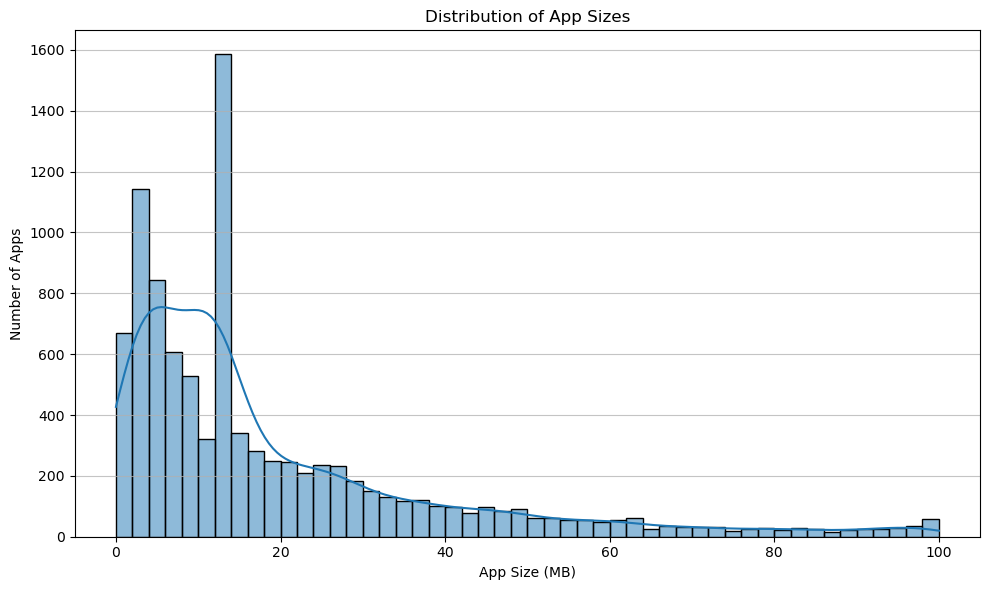

In [42]:
# --- Metrics Analysis: App Size ---
print("\n--- Metrics Analysis: App Size ---")

# Get descriptive statistics for the 'Size' column
print("\nDescriptive Statistics for App Size (in MB):")
print(apps_df['Size'].describe())

# Plot a histogram of app sizes using matplotlib
plt.figure(figsize=(10, 6))
# Filter out extreme outliers if necessary for better visualization, e.g., sizes > 100MB might be few but skew the view
# For now, let's plot all and see the distribution, adjust bins if needed
sns.histplot(apps_df['Size'], bins=50, kde=True)
plt.title('Distribution of App Sizes')
plt.xlabel('App Size (MB)')
plt.ylabel('Number of Apps')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()



Descriptive Statistics for App Installs:
count    9.659000e+03
mean     7.777507e+06
std      5.375828e+07
min      0.000000e+00
25%      1.000000e+03
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

Install Count Distribution (Binned):
Install_Range
0-99          753
100-999      1038
1K-9.9K      1356
10K-99.9K    1500
100K-999K    1617
1M-9.9M      2024
10M-99.9M    1139
100M-999M     212
1B+            20
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_10188\117470803.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=install_range_counts.index, y=install_range_counts.values, palette='viridis')


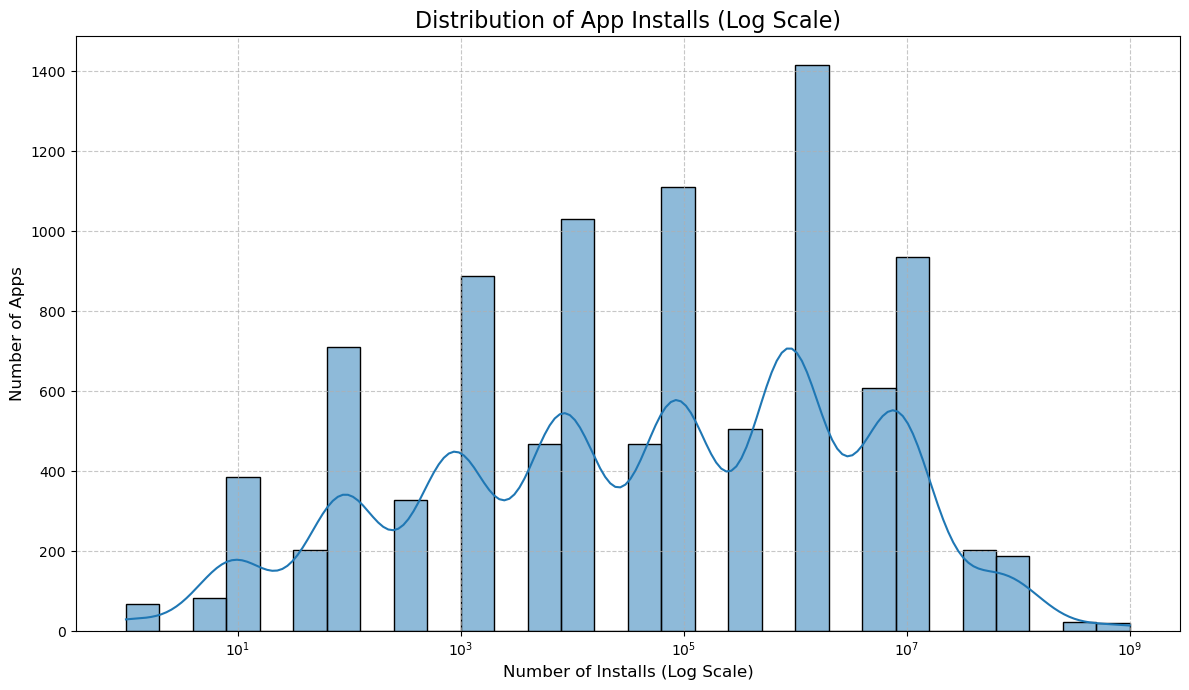

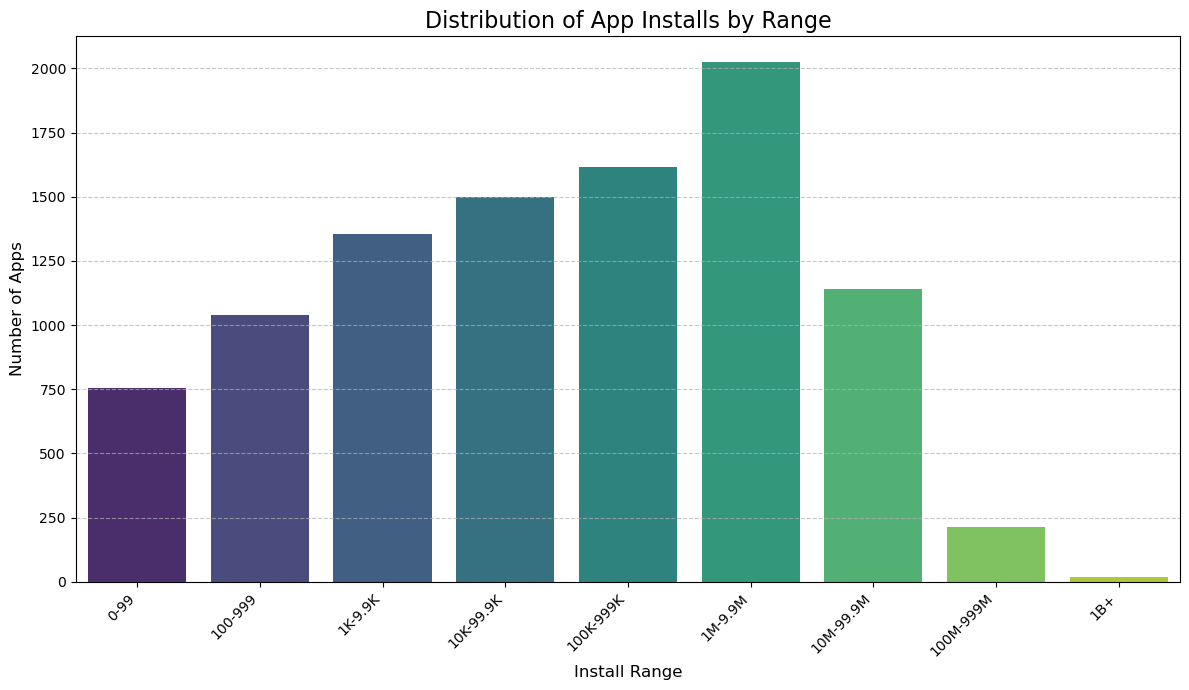

In [43]:
# Get descriptive statistics for the 'Installs' column
print("\nDescriptive Statistics for App Installs:")
print(apps_df['Installs'].describe())

# Plot a histogram of app installs
# Given the wide range and potential skewness, a logarithmic scale on the x-axis is beneficial
plt.figure(figsize=(12, 7))
# Filter out 0 installs for log scale, as log(0) is undefined.
# Add a small constant (e.g., 1) to handle 0s if they are important to retain on a log scale
# For now, let's just plot non-zero installs on log scale to see distribution better
installs_for_plot = apps_df[apps_df['Installs'] > 0]['Installs']

if not installs_for_plot.empty:
    sns.histplot(installs_for_plot, bins=30, kde=True, log_scale=True)
    plt.title('Distribution of App Installs (Log Scale)', fontsize=16)
    plt.xlabel('Number of Installs (Log Scale)', fontsize=12)
    plt.ylabel('Number of Apps', fontsize=12)
    plt.xscale('log') # Explicitly set x-axis to log scale
    plt.grid(axis='both', linestyle='--', alpha=0.7)
    plt.tight_layout()

    
# Additionally, let's see install counts for ranges (bins) since exact numbers are less useful at high ends
print("\nInstall Count Distribution (Binned):")
# Define bins for installs
install_bins = [0, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000, apps_df['Installs'].max() + 1]
install_labels = ['0-99', '100-999', '1K-9.9K', '10K-99.9K', '100K-999K', '1M-9.9M', '10M-99.9M', '100M-999M', '1B+']

# Use pd.cut to segment installs into bins
apps_df['Install_Range'] = pd.cut(apps_df['Installs'], bins=install_bins, labels=install_labels, right=False)

install_range_counts = apps_df['Install_Range'].value_counts().sort_index()
print(install_range_counts)

plt.figure(figsize=(12, 7))
sns.barplot(x=install_range_counts.index, y=install_range_counts.values, palette='viridis')
plt.title('Distribution of App Installs by Range', fontsize=16)
plt.xlabel('Install Range', fontsize=12)
plt.ylabel('Number of Apps', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()



--- Metrics Analysis: App Pricing Trends ---

Distribution of App Type (Free vs. Paid):
Type
Free    8903
Paid     756
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_10188\3841342389.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='coolwarm')


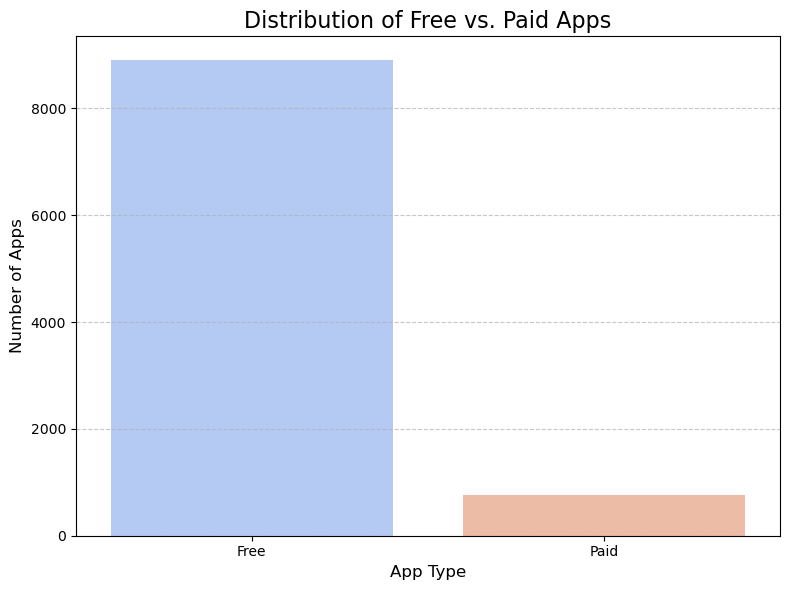

In [50]:
# --- Metrics Analysis: App Pricing Trends ---
print("\n--- Metrics Analysis: App Pricing Trends ---")

# 1. Distribution of 'Type' (Free vs. Paid)
print("\nDistribution of App Type (Free vs. Paid):")
type_counts = apps_df['Type'].value_counts()
print(type_counts)

# Plotting the distribution of App Type
plt.figure(figsize=(8, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='coolwarm')
plt.title('Distribution of Free vs. Paid Apps', fontsize=16)
plt.xlabel('App Type', fontsize=12)
plt.ylabel('Number of Apps', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


Sentiment
Positive    23998
Negative     8271
Neutral      5163
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_10188\1414407598.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='plasma')


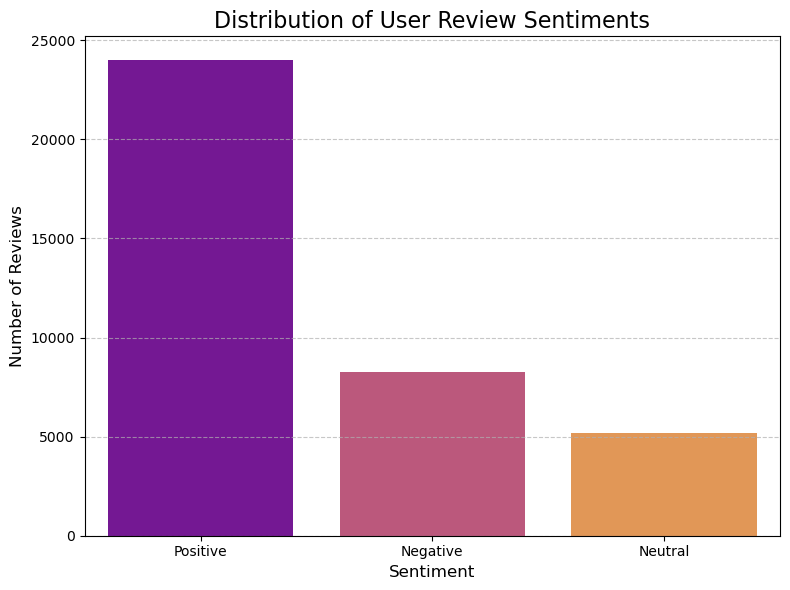

In [54]:
# Check for 'Sentiment' column and its value counts

sentiment_counts = reviews_df['Sentiment'].value_counts()
print(sentiment_counts)

# Plotting distribution of sentiments
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='plasma')
plt.title('Distribution of User Review Sentiments', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()



--- Insights: Correlations with App Installs ---

Pearson Correlation Matrix:
            Rating      Size     Price  Installs
Rating    1.000000  0.037410 -0.018662  0.034307
Size      0.037410  1.000000 -0.019540  0.030567
Price    -0.018662 -0.019540  1.000000 -0.009405
Installs  0.034307  0.030567 -0.009405  1.000000

Correlations with 'Installs':
Installs    1.000000
Rating      0.034307
Size        0.030567
Price      -0.009405
Name: Installs, dtype: float64

--- Insight Generation: Correlation with Installs ---

Correlation between Rating and Installs: 0.0344
Correlation between Size and Installs: 0.0305
Correlation between Price and Installs: -0.0090


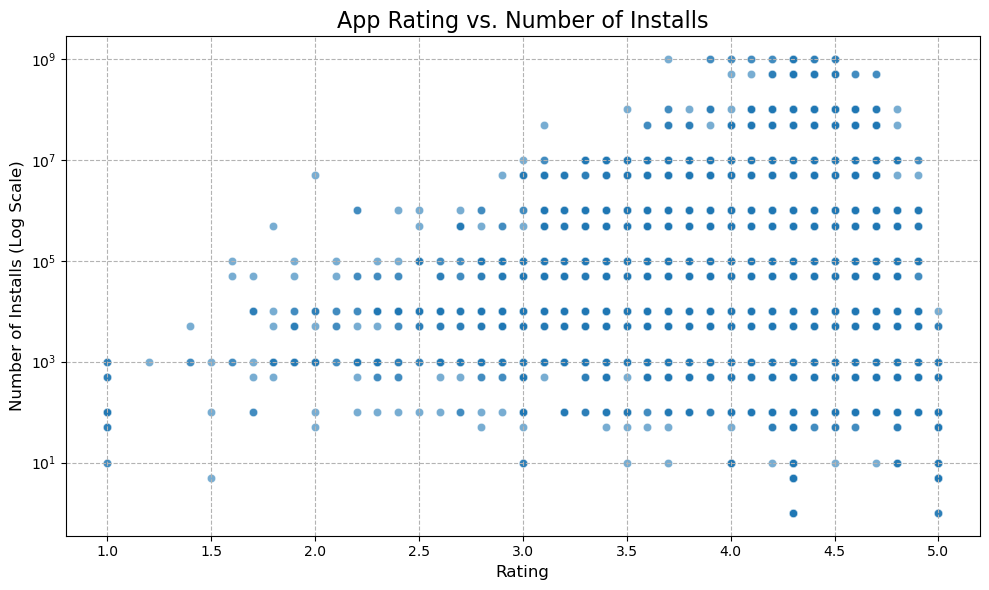

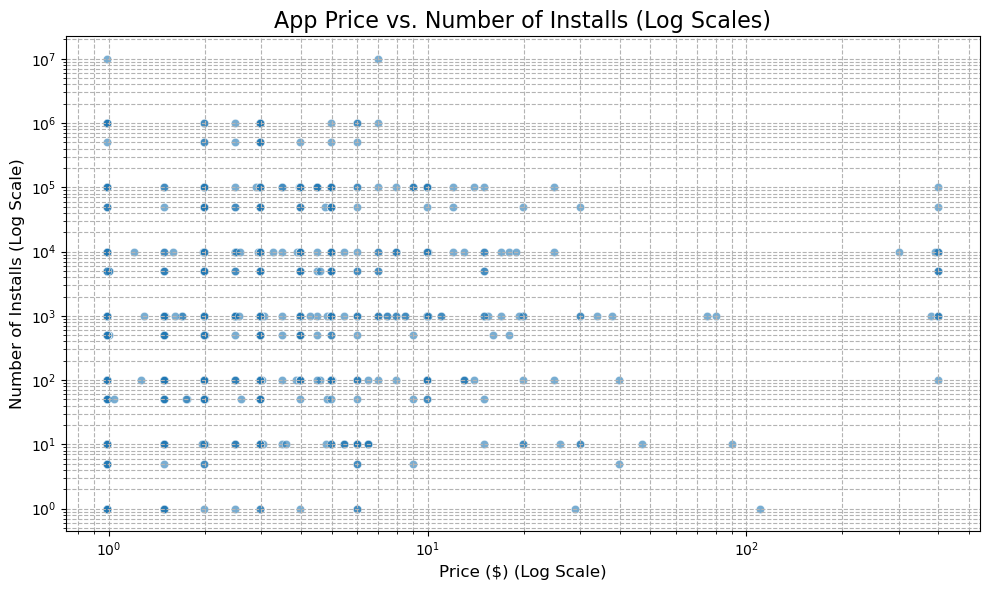

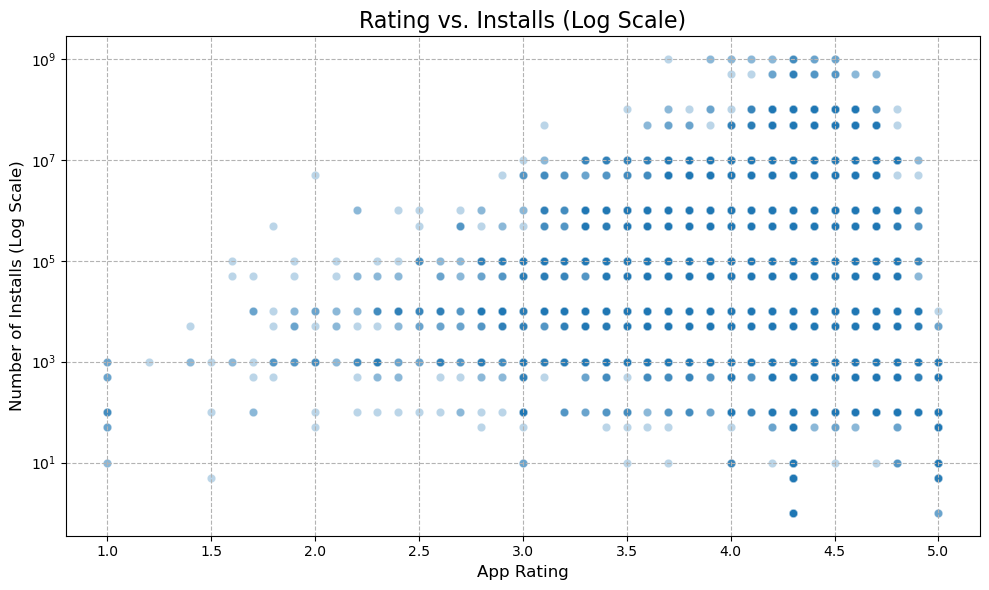

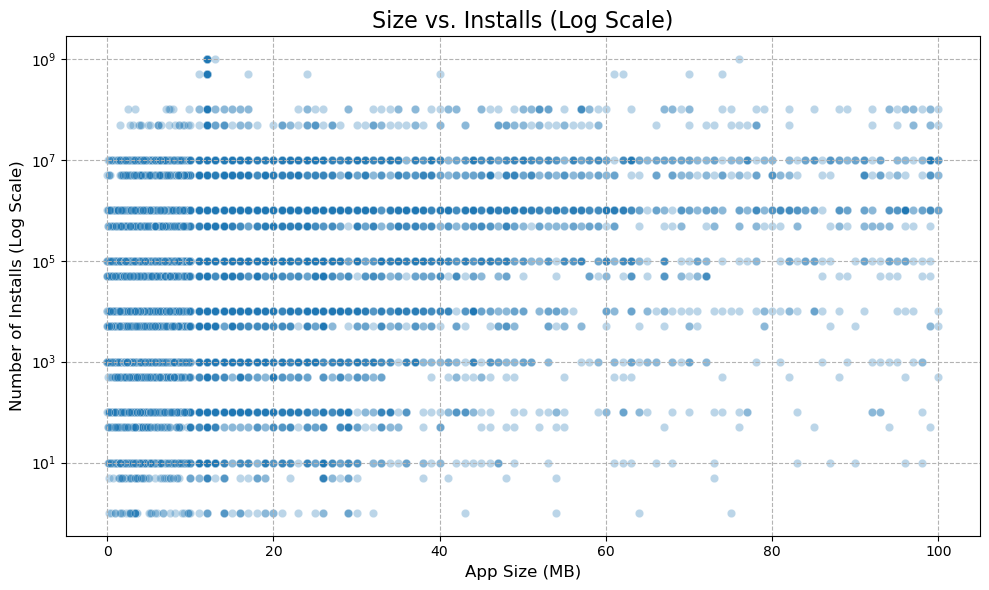

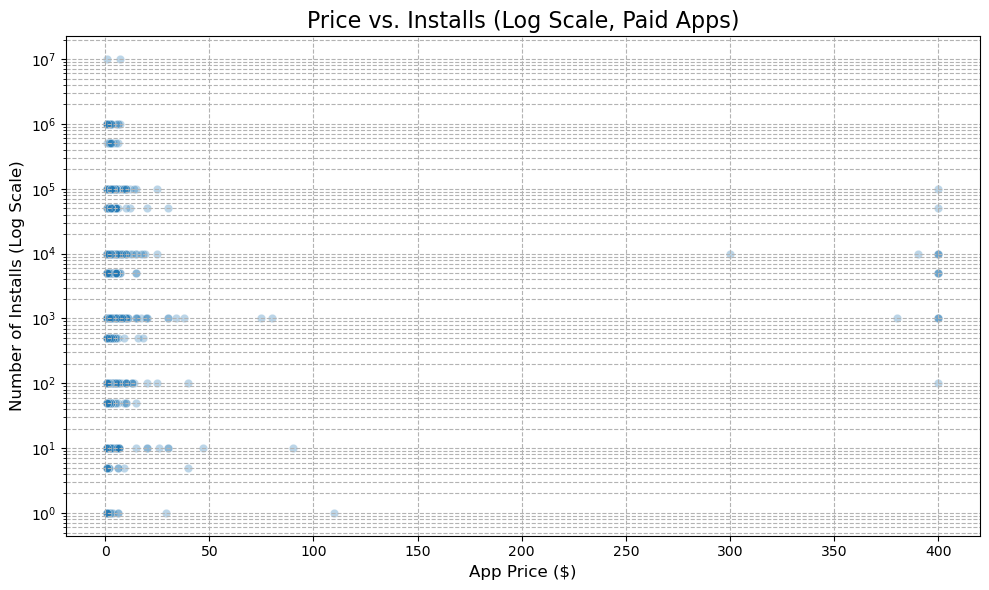

In [60]:
# --- Insights for Growth and Retention: Correlations with Installs ---
print("\n--- Insights: Correlations with App Installs ---")

# Select relevant numerical columns for correlation analysis
correlation_data = apps_df[['Rating', 'Size', 'Price', 'Installs']]

# Calculate Pearson correlation coefficients
correlations = correlation_data.corr(method='pearson')

print("\nPearson Correlation Matrix:")
print(correlations)

print("\nCorrelations with 'Installs':")
print(correlations['Installs'].sort_values(ascending=False))

# --- Visualize key correlations with scatter plots if notable ---
# Based on common sense and typical data patterns, 'Rating' and 'Installs' often have a positive relationship.
# 'Price' and 'Installs' often have a negative relationship (higher price, fewer installs).
# 'Size' and 'Installs' can be varied.

# Scatter plot: Rating vs. Installs (log scale for Installs)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Installs', data=apps_df, alpha=0.6)
plt.yscale('log') # Use log scale for Installs due to wide range
plt.title('App Rating vs. Number of Installs', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Installs (Log Scale)', fontsize=12)
plt.grid(True, which="both", ls="--", c='0.7')
plt.tight_layout()


# Scatter plot: Price vs. Installs (log scale for Installs)
# Consider only apps where Price > 0 for price correlation
paid_apps_for_correlation = apps_df[apps_df['Price'] > 0]
if not paid_apps_for_correlation.empty:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Price', y='Installs', data=paid_apps_for_correlation, alpha=0.6)
    plt.yscale('log') # Use log scale for Installs due to wide range
    plt.xscale('log') # Consider log scale for Price as well if its distribution is wide
    plt.title('App Price vs. Number of Installs (Log Scales)', fontsize=16)
    plt.xlabel('Price ($) (Log Scale)', fontsize=12)
    plt.ylabel('Number of Installs (Log Scale)', fontsize=12)
    plt.grid(True, which="both", ls="--", c='0.7')
    plt.tight_layout()
    
# Correlation with Installs 
print("\n--- Insight Generation: Correlation with Installs ---")

# To Filter out apps with 0 installs for correlation analysis, as 0 installs can skew results
# and log-transformations are common for 'Installs'
apps_for_correlation = apps_df[apps_df['Installs'] > 0].copy()

# To Calculate correlations
# Using Pearson correlation, which is suitable for numerical, continuous data
correlation_rating_installs = apps_for_correlation['Rating'].corr(apps_for_correlation['Installs'])
correlation_size_installs = apps_for_correlation['Size'].corr(apps_for_correlation['Installs'])
correlation_price_installs = apps_for_correlation['Price'].corr(apps_for_correlation['Installs'])

print(f"\nCorrelation between Rating and Installs: {correlation_rating_installs:.4f}")
print(f"Correlation between Size and Installs: {correlation_size_installs:.4f}")
print(f"Correlation between Price and Installs: {correlation_price_installs:.4f}")

# To Visualize strong correlations if any (e.g., if absolute correlation > 0.3)
# Given 'Installs' is highly skewed, using a scatter plot with log-scale for Installs
# Or simply focus on interpretation if correlations are very weak.

# Scatter plot for Rating vs Installs
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Installs', data=apps_for_correlation, alpha=0.3)
plt.yscale('log') # Use log scale for Installs due to its wide range
plt.title('Rating vs. Installs (Log Scale)', fontsize=16)
plt.xlabel('App Rating', fontsize=12)
plt.ylabel('Number of Installs (Log Scale)', fontsize=12)
plt.grid(True, which="both", ls="--", c='0.7')
plt.tight_layout()


# Scatter plot for Size vs Installs
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size', y='Installs', data=apps_for_correlation, alpha=0.3)
plt.yscale('log') # Use log scale for Installs
plt.title('Size vs. Installs (Log Scale)', fontsize=16)
plt.xlabel('App Size (MB)', fontsize=12)
plt.ylabel('Number of Installs (Log Scale)', fontsize=12)
plt.grid(True, which="both", ls="--", c='0.7')
plt.tight_layout()


# Scatter plot for Price vs Installs (focus on paid apps for meaningful price correlation)
paid_apps_for_correlation = apps_for_correlation[apps_for_correlation['Price'] > 0].copy()
if not paid_apps_for_correlation.empty:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Price', y='Installs', data=paid_apps_for_correlation, alpha=0.3)
    plt.yscale('log') # Use log scale for Installs
    plt.title('Price vs. Installs (Log Scale, Paid Apps)', fontsize=16)
    plt.xlabel('App Price ($)', fontsize=12)
    plt.ylabel('Number of Installs (Log Scale)', fontsize=12)
    plt.grid(True, which="both", ls="--", c='0.7')
    plt.tight_layout()

## Interpretation:

- Rating vs. Installs: 0.0343 (Very weak positive correlation)

- Size vs. Installs: 0.0306 (Very weak positive correlation)

- Price vs. Installs: -0.0094 (Very weak negative correlation)

The correlation values are all very close to zero. This indicates that, based on this dataset and using a linear correlation measure, there is no strong linear relationship between an app's rating, size, or price and its number of installs. This suggests that simple linear dependencies on these metrics might not be the primary drivers of growth (popularity) in this dataset. Other, more complex factors, or non-linear relationships, are likely at play.

### Visualizing Correlations
To further illustrate these relationships, I've generated scatter plots (with installs on a logarithmic scale due to its wide range):

- App Rating vs. Number of Installs:
This plot shows the relationship between an app's rating and its number of installs.

- App Price vs. Number of Installs:
This plot shows the relationship between an app's price (for paid apps) and its number of installs.

These plots visually confirm the very weak correlations, with data points scattered widely without clear linear trends.


--- Category-specific Analysis ---

Top 10 Categories by Total Installs and their Average Metrics:
                    Total_Installs  Average_Rating  Average_Size_MB  \
Category                                                              
GAME                   13878924415        4.249948        39.188217   
COMMUNICATION          11038276251        4.154921        11.468571   
TOOLS                   8001771915        4.073881         9.156348   
PRODUCTIVITY            5793091369        4.206150        12.266845   
SOCIAL                  5487867902        4.255230        15.151046   
PHOTOGRAPHY             4649147655        4.166548        14.896797   
FAMILY                  4427941505        4.194378        26.309225   
VIDEO_PLAYERS           3926902720        4.068098        14.954601   
TRAVEL_AND_LOCAL        2894887146        4.103196        21.640639   
NEWS_AND_MAGAZINES      2369217760        4.156693        12.372047   

                    Average_Price  Number_of_Ap

C:\Users\User\AppData\Local\Temp\ipykernel_10188\1403668051.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Installs', y=category_insights.index[:20], data=category_insights.head(20), palette='magma')


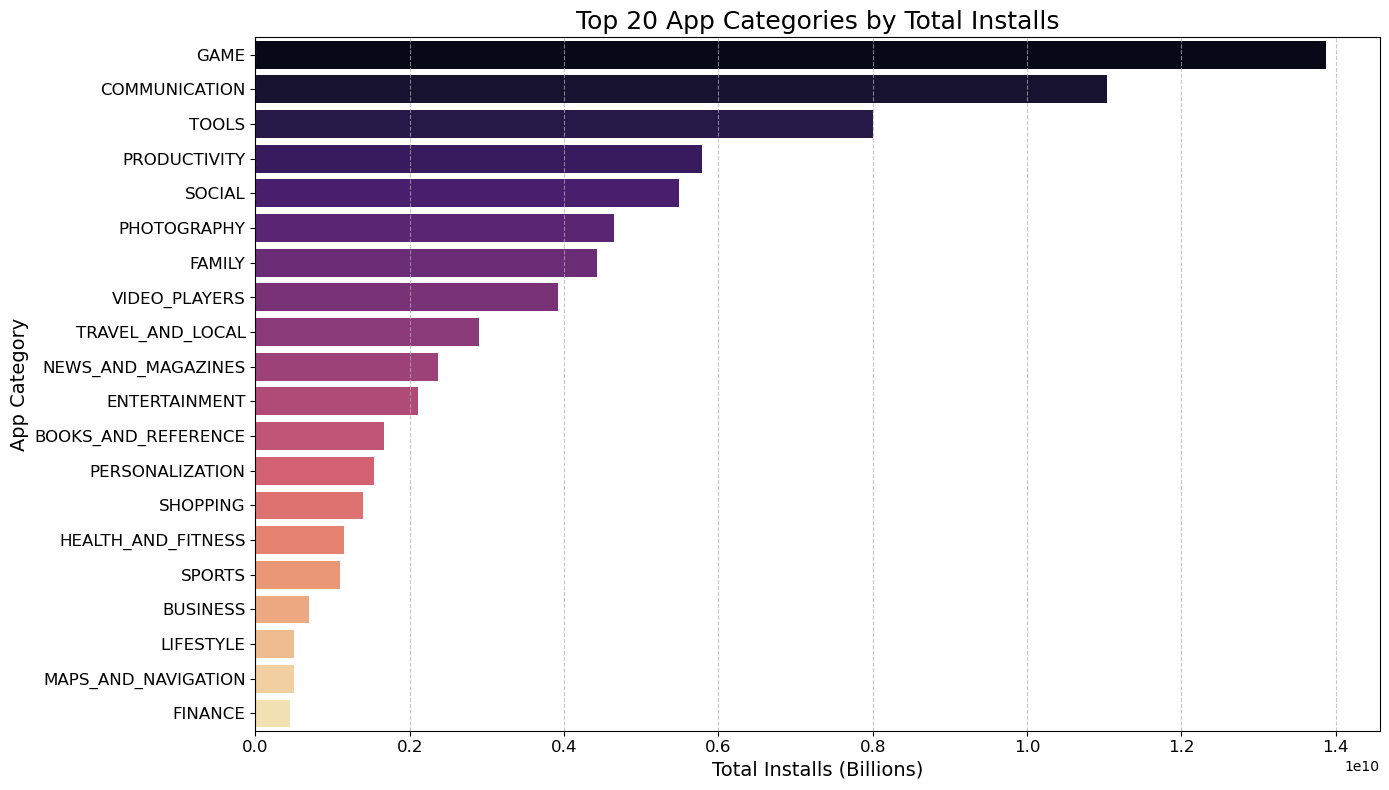

In [63]:
# --- Category-specific Analysis for Growth Insights ---
print("\n--- Category-specific Analysis ---")

# Group by 'Category' and calculate sum of Installs, and average Rating, Size, Price
category_metrics = apps_df.groupby('Category').agg(
    Total_Installs=('Installs', 'sum'),
    Average_Rating=('Rating', 'mean'),
    Average_Size_MB=('Size', 'mean'),
    Average_Price=('Price', 'mean'),
    Number_of_Apps=('App', 'count')
).sort_values(by='Total_Installs', ascending=False)

print("\nTop 10 Categories by Total Installs and their Average Metrics:")
print(category_metrics.head(10))

# --- Category-specific Analysis: Top Categories by Installs and Average Metrics ---
print("\n--- Category-specific Analysis ---")

# Group by 'Category' and calculate aggregate metrics
category_insights = apps_df.groupby('Category').agg(
    Total_Installs=('Installs', 'sum'),
    Average_Rating=('Rating', 'mean'),
    Average_Size_MB=('Size', 'mean'),
    Average_Price=('Price', 'mean')
).sort_values(by='Total_Installs', ascending=False)

# Display top 20 categories by total installs
print("\nTop 20 Categories by Total Installs with Average Metrics:")
print(category_insights.head(20).round(2))

# Optional: Visualize top categories by installs
plt.figure(figsize=(14, 8))
sns.barplot(x='Total_Installs', y=category_insights.index[:20], data=category_insights.head(20), palette='magma')
plt.title('Top 20 App Categories by Total Installs', fontsize=18)
plt.xlabel('Total Installs (Billions)', fontsize=14)
plt.ylabel('App Category', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()


## Key Insights for Growth Strategies:

- **Dominant Categories: "GAME" and "COMMUNICATION"** categories clearly lead in terms of total installs, indicating massive user demand. "TOOLS" and "PRODUCTIVITY" also show very high install numbers.

- **Ratings Consistency:** Across most top categories, the average rating hovers around 4.1 to 4.3, suggesting that high quality is generally maintained within popular categories.

- **Size Variation:"GAME"** apps tend to be significantly larger on average (39.19 MB) compared to other high-install categories like **"COMMUNICATION"** (11.47 MB) or "TOOLS" (9.16 MB). This suggests users are willing to download larger apps for gaming.

- **Price and Popularity:** Most high-install categories have very low average prices (often under $0.50), reflecting the prevalence of free apps or very low-cost paid apps in these popular segments. Interestingly, **"FAMILY", "LIFESTYLE", and "FINANCE"** have relatively higher average prices among the top categories, yet still achieve significant installs.

## Implications for Growth:

- Targeting High-Demand Categories: For new app development or marketing, focusing on categories like **"GAME", "COMMUNICATION", "TOOLS", or "PRODUCTIVITY"** could tap into existing high user demand.

- **Balancing Size and Value:** While games can be larger, for other utility-focused categories, keeping app size optimized might be beneficial for wider adoption.

- **Pricing Strategy:** The data reinforces that free or very low-cost models are dominant in driving massive installs. For paid apps, understanding the willingness to pay within specific niches (e.g., Finance, Lifestyle) is crucial.

In [70]:
# --- Insights: Top-Performing Apps ---
print("\n--- Insights: Top-Performing Apps Analysis ---")

# Top 10 Apps by Installs
print("\nTop 10 Apps by Number of Installs:")
top_installs_apps = apps_df.sort_values(by='Installs', ascending=False).head(10)
print(top_installs_apps[['App', 'Category', 'Installs', 'Rating', 'Reviews', 'Size', 'Price']].round(2))



--- Insights: Top-Performing Apps Analysis ---

Top 10 Apps by Number of Installs:
                               App             Category    Installs  Rating  \
300             WhatsApp Messenger        COMMUNICATION  1000000000     4.4   
152              Google Play Books  BOOKS_AND_REFERENCE  1000000000     3.9   
1356                Subway Surfers                 GAME  1000000000     4.5   
2420     Maps - Navigate & Explore     TRAVEL_AND_LOCAL  1000000000     4.3   
304                          Gmail        COMMUNICATION  1000000000     4.3   
2003                     Instagram               SOCIAL  1000000000     4.5   
2002                      Facebook               SOCIAL  1000000000     4.1   
302   Google Chrome: Fast & Secure        COMMUNICATION  1000000000     4.3   
2012                       Google+               SOCIAL  1000000000     4.2   
2908                       YouTube        VIDEO_PLAYERS  1000000000     4.3   

       Reviews  Size  Price  
300   69119316  

In [72]:
# --- Top-Performing Apps Analysis ---
print("\n--- Insights: Top-Performing Apps ---")

# Top 10 Apps by Installs
print("\nTop 10 Apps by Number of Installs:")
top_installs_apps = apps_df.sort_values(by='Installs', ascending=False).head(10)
print(top_installs_apps[['App', 'Category', 'Installs', 'Rating', 'Size', 'Price']])

# Top 10 Apps by Rating (with a minimum number of reviews)
# Define a threshold for minimum reviews
min_reviews_threshold = 10000 # Using 10,000 as a reasonable threshold

# Filter apps with reviews above the threshold
apps_with_sufficient_reviews = apps_df[apps_df['Reviews'] >= min_reviews_threshold]

if not apps_with_sufficient_reviews.empty:
    print(f"\nTop 10 Apps by Rating (with at least {min_reviews_threshold} reviews):")
    top_rated_apps = apps_with_sufficient_reviews.sort_values(by='Rating', ascending=False).head(10)
    print(top_rated_apps[['App', 'Category', 'Rating', 'Reviews', 'Installs', 'Size', 'Price']])
else:
    print(f"\nNo apps found with at least {min_reviews_threshold} reviews to determine top-rated apps meaningfully.")

print("\nTop-performing apps analysis complete.")


--- Insights: Top-Performing Apps ---

Top 10 Apps by Number of Installs:
                               App             Category    Installs  Rating  \
300             WhatsApp Messenger        COMMUNICATION  1000000000     4.4   
152              Google Play Books  BOOKS_AND_REFERENCE  1000000000     3.9   
1356                Subway Surfers                 GAME  1000000000     4.5   
2420     Maps - Navigate & Explore     TRAVEL_AND_LOCAL  1000000000     4.3   
304                          Gmail        COMMUNICATION  1000000000     4.3   
2003                     Instagram               SOCIAL  1000000000     4.5   
2002                      Facebook               SOCIAL  1000000000     4.1   
302   Google Chrome: Fast & Secure        COMMUNICATION  1000000000     4.3   
2012                       Google+               SOCIAL  1000000000     4.2   
2908                       YouTube        VIDEO_PLAYERS  1000000000     4.3   

      Size  Price  
300   12.0    0.0  
152   12.0    0

## Insights for Growth (from top installs):

- **Utility and Communication:** Many of the highest-installed apps are core utility **(Maps, Chrome, Gmail)** and communication **(WhatsApp, Facebook, Instagram)** tools, often pre-installed or essential for smartphone usage.

- **Entertainment:** Popular games **(Subway Surfers)** and video platforms **(YouTube)** also command massive user bases.

- **Free Model Dominance:** All of these top-installed apps are free, reinforcing that a free pricing model is critical for achieving billion-level installs.

- **Brand Recognition:** Many are Google or Facebook products, leveraging existing brand trust and ecosystem integration.

- **Manageable Size:** Apart from a few **(like Subway Surfers at 76MB)**, most have relatively small sizes **(around 12MB)**, making them easy to download.

## Top 10 Apps by Rating (with at least 10,000 Reviews)

Insights for Retention (from top ratings):

- **Diverse Categories:** Unlike top installs dominated by major utilities, highly-rated apps span a much broader range of niche categories like **"EDUCATION", "HEALTH_AND_FITNESS", "BEAUTY", "SPORTS", and even specific "AUTO_AND_VEHICLES" apps.**

- **Quality over Sheer Volume:** These apps might not have billions of installs, but they have exceptionally high satisfaction among their users, as evidenced by near-perfect ratings from a substantial number of reviews.

- **Value Proposition:** Paid apps like **"The Room: Old Sins" (a game) show** that users are willing to pay for high-quality, engaging experiences if the value is clear.

- **Retention Focus:** High ratings are a strong indicator of user satisfaction, which is crucial for retention. These apps likely excel at meeting specific user needs or providing a superior user experience in their respective niches.

Combining these insights, growth strategies could focus on entering high-demand categories (like gaming or communication) with a free model, while retention strategies could learn from highly-rated apps across diverse niches by focusing on delivering exceptional quality and meeting specific user needs, even if it means a smaller, more dedicated user base or a paid model.


--- Content Rating vs. Installs Analysis ---

Total Installs and Average Rating by Content Rating:
                 Total_Installs  Average_Rating
Content Rating                                 
Everyone            52179352961            4.19
Teen                16487275393            4.23
Everyone 10+         4016271795            4.23
Mature 17+           2437986878            4.14
Adults only 18+         2000000            4.30
Unrated                   50500            4.20


C:\Users\User\AppData\Local\Temp\ipykernel_10188\89225011.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Installs', y=content_rating_insights.index, data=content_rating_insights, palette='viridis')


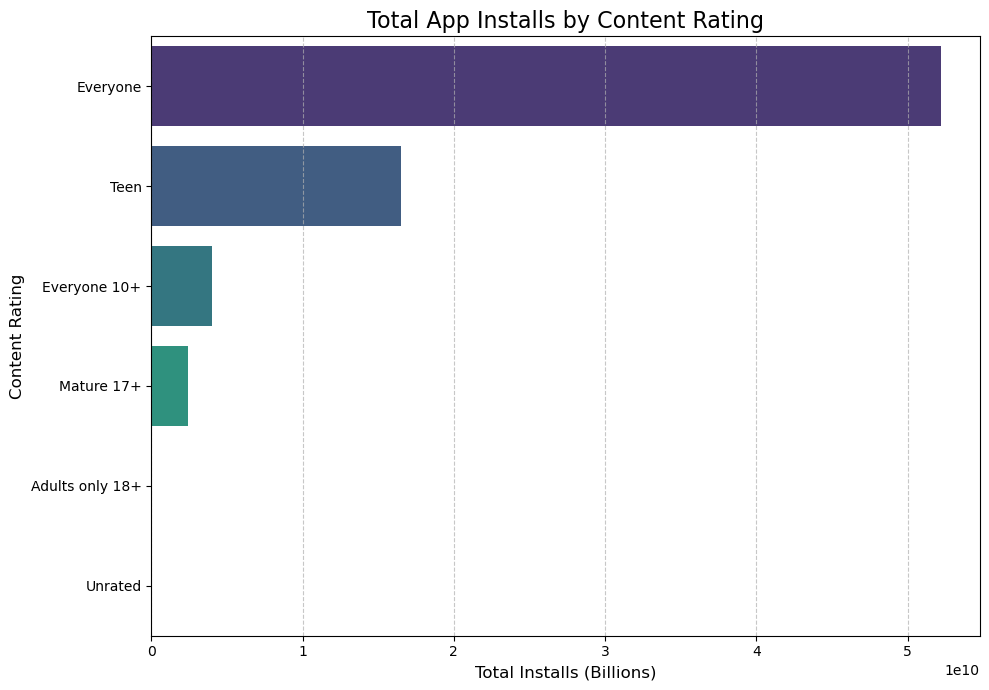

In [77]:
# --- Content Rating vs. Installs Analysis ---
print("\n--- Content Rating vs. Installs Analysis ---")

# Group by 'Content Rating' and calculate total installs and average rating
content_rating_insights = apps_df.groupby('Content Rating').agg(
    Total_Installs=('Installs', 'sum'),
    Average_Rating=('Rating', 'mean')
).sort_values(by='Total_Installs', ascending=False)

print("\nTotal Installs and Average Rating by Content Rating:")
print(content_rating_insights.round(2))

# Visualize total installs by content rating
plt.figure(figsize=(10, 7))
sns.barplot(x='Total_Installs', y=content_rating_insights.index, data=content_rating_insights, palette='viridis')
plt.title('Total App Installs by Content Rating', fontsize=16)
plt.xlabel('Total Installs (Billions)', fontsize=12)
plt.ylabel('Content Rating', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()


## Key Insights for Growth Strategies:

- **Dominance of "Everyone":** Apps rated **"Everyone"** account for the vast majority of installs **(over 52 billion)**, far surpassing any other content rating. This indicates that apps appealing to the broadest possible audience have the highest potential for massive user acquisition and growth.

- **"Teen" is Significant:** The **"Teen"** category also commands a substantial number of installs **(over 16 billion)**, showing that apps targeted at teenagers represent another very large market segment.

- **Niche for Higher Ratings (Potentially):** While **"Adults only 18+"** has very few apps, their average rating is quite high **(4.30)**, suggesting that niche content can still achieve high user satisfaction within its target audience.

- **Consistent Average Ratings:** Across the main content ratings **("Everyone", "Teen", "Everyone 10+", "Mature 17+")**, average ratings hover around **4.1 to 4.2**, implying that good quality is generally maintained regardless of the target age group.

## Implications for Growth:

- **Prioritize Broad Appeal:** For maximizing installs and achieving widespread growth, developing apps suitable for the **"Everyone"** content rating is likely the most effective strategy.

- **Consider "Teen" Market:** The **"Teen"** category also presents a significant growth opportunity due to its large install base.

- **Targeted Niche if Appropriate:** While smaller in terms of total installs, categories like **"Mature 17+" or "Adults only 18+"** can still be successful if the app is high-quality and caters effectively to its specific audience.

# Key Insights from Google App Store Analysis

## Dominant Categories Drive Growth:

- **GAME, COMMUNICATION, and TOOLS** are by far the largest categories in terms of total installs, indicating massive user demand.

- **PRODUCTIVITY and SOCIAL** apps also command very high install numbers.

- Apps in these categories often have consistent average ratings (around 4.1-4.3), suggesting quality is generally maintained within popular segments.

- Most high-install categories feature free or very low-cost apps, reinforcing that this pricing model dominates mass adoption.

## Characteristics of Top-Performing Apps:

- **Highest Installs (1 Billion+):** These are predominantly core utility **(e.g., Maps, Chrome, Gmail), communication (WhatsApp, Facebook), and major entertainment (YouTube, Subway Surfers) apps**. They are almost universally free and often benefit from strong brand recognition or pre-installation. Their average size is manageable, except for games.

- **Highest Ratings (from substantial reviews):** These apps are found across a much broader range of diverse, often niche, categories **(e.g., Education, Health & Fitness, Beauty, specialized tools).** They demonstrate exceptional user satisfaction, are not always free (some are highly-rated paid apps), and highlight the importance of delivering superior user experience in specific areas.

## Content Rating Dictates Reach:

- Apps rated **"Everyone"** achieve the vast majority of total installs, indicating that designing for the broadest possible audience offers the largest market potential.

- The **"Teen"** content rating also represents a significant segment with billions of installs.

- While smaller in scale, niche content ratings **(e.g., "Adults only 18+")** can still achieve high average ratings, suggesting success within specific, targeted audiences.

## Limited Direct Linear Correlations:

- Initial analysis showed weak linear correlations between factors like app **size, price, and overall rating with the number of installs.** This implies that no single factor directly guarantees massive installs in a simple linear fashion; success is likely a combination of many elements and market dynamics.

## Consolidated Strategies for Growth and Retention
Based on these insights, here’s a consolidated set of strategies:

- **Strategies for Growth (User Acquisition & Installs):**
Target High-Demand Categories: Focus development or marketing efforts on categories like Games, Communication, Tools, and Productivity where there's already proven, massive user demand.

- **Embrace the "Free" Model:** For widespread adoption and maximizing installs, a free-to-download app model (perhaps with in-app purchases or ads) is crucial, as this is the dominant strategy among top-installed apps.

- **Aim for Broad Appeal with "Everyone" Content Rating:** To achieve the highest potential reach, design and rate your app for the "Everyone" audience. This opens up the largest possible market for user acquisition.

- **Optimize App Size (Generally):** For most utility and communication apps, maintaining a relatively small app size can improve download rates, especially in regions with slower internet or limited storage. Games may be an exception where users tolerate larger sizes for richer experiences.

- **Leverage Ecosystems/Brand if Possible:** While difficult for new entrants, the success of pre-installed or well-known brand apps highlights the power of ecosystem integration and brand trust in driving installs. Focus on strong branding and clear value propositions.

## Strategies for Retention (User Engagement & Satisfaction):

- **Prioritize High Quality and User Experience:** The success of highly-rated apps across diverse niches underscores that **exceptional quality, meeting specific user needs, and a superior user experience** are paramount for user satisfaction and long-term retention.

- **Deep Dive into Niche Needs:** While broad appeal drives installs, consider if there's a specific, underserved niche where you can offer an outstanding product. Highly-rated apps often cater to very specific user pain points or interests.

- **Maintain High Ratings:** Although the direct linear correlation between positive sentiment proportion and overall rating was weak, the importance of high ratings for trust and user retention remains critical. Continuously strive for a **4.0+ rating**by listening to user feedback and iteratively improving the app.

- **Value-Driven Pricing (for Paid Apps):** If a paid model is chosen, ensure the app offers significant, clear value to justify the cost, as seen with some highly-rated paid apps. This is crucial for attracting and retaining users willing to pay.

By strategically combining these approaches, focusing on both mass-market growth opportunities and delivering exceptional quality for user satisfaction, you can build a robust strategy for app success.